In [ ]:
from google.colab import drive
drive.mount('/content/drive')


from google.colab import files

Mounted at /content/drive


In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Load the dataset
merge_final_file= '/content/drive/MyDrive/ElectricityThesisData/Final/merged_Finalcsv2024Jan20.csv'
data = pd.read_csv(merge_final_file)


# Data Inspection

In [ ]:
# Display the first few rows
print(data.head())

  Observation station Customer Location  Year  Month  Day  Hour  \
0      Vesanto parish  Mokki Rautalampi  2019      7   31    21   
1      Vesanto parish  Mokki Rautalampi  2019      7   31    22   
2      Vesanto parish  Mokki Rautalampi  2019      7   31    23   
3      Vesanto parish  Mokki Rautalampi  2019      8    1     0   
4      Vesanto parish  Mokki Rautalampi  2019      8    1     1   

   Average temperature [°C]  Quantity  
0                      10.8      2.28  
1                      10.7      3.41  
2                      10.4      2.00  
3                       9.8      2.94  
4                       9.7      2.18  


In [ ]:
# Display basic information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185322 entries, 0 to 185321
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Observation station       185322 non-null  object 
 1   Customer Location         185322 non-null  object 
 2   Year                      185322 non-null  int64  
 3   Month                     185322 non-null  int64  
 4   Day                       185322 non-null  int64  
 5   Hour                      185322 non-null  int64  
 6   Average temperature [°C]  185322 non-null  float64
 7   Quantity                  185322 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 11.3+ MB
None


# Reformat the date time columns

In [ ]:

data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])


data['week'] = data['Date'].dt.isocalendar().week

In [ ]:
print(data.head())

  Observation station Customer Location  Year  Month  Day  Hour  \
0      Vesanto parish  Mokki Rautalampi  2019      7   31    21   
1      Vesanto parish  Mokki Rautalampi  2019      7   31    22   
2      Vesanto parish  Mokki Rautalampi  2019      7   31    23   
3      Vesanto parish  Mokki Rautalampi  2019      8    1     0   
4      Vesanto parish  Mokki Rautalampi  2019      8    1     1   

   Average temperature [°C]  Quantity       Date  week  
0                      10.8      2.28 2019-07-31    31  
1                      10.7      3.41 2019-07-31    31  
2                      10.4      2.00 2019-07-31    31  
3                       9.8      2.94 2019-08-01    31  
4                       9.7      2.18 2019-08-01    31  


In [ ]:
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Observation station         0
Customer Location           0
Year                        0
Month                       0
Day                         0
Hour                        0
Average temperature [°C]    0
Quantity                    0
Date                        0
week                        0
dtype: int64


In [ ]:
#How many unique years we have in Dataset
print(data.Year.unique(),"\n")
print("Total Number of unique year",data.Year.nunique(),"\n" )

[2019 2020 2021 2022 2023] 

Total Number of unique year 5 



# Lets see the energy consumption of each year

<ipython-input-11-67b9917715cc>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


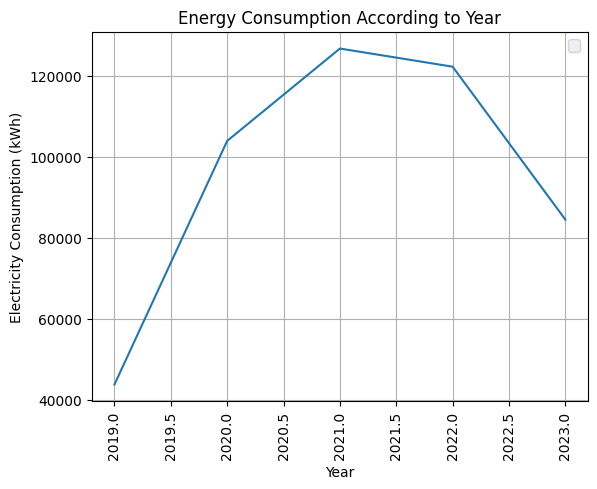

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

# Group the data by 'Year' and sum the 'Quantity' for each year
yearly_consumption = data.groupby('Year')['Quantity'].sum().reset_index()

# Plotting
fig = plt.figure()
ax1 = plt.subplot2grid((1, 1), (0, 0))

style.use('ggplot')

sns.lineplot(x=yearly_consumption["Year"], y=yearly_consumption["Quantity"])
sns.set(rc={'figure.figsize': (15, 6)})

plt.title("Energy Consumption According to Year")
plt.xlabel("Year")
plt.ylabel("Electricity Consumption (kWh)")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.show()

# Individual Energy consumption of each year

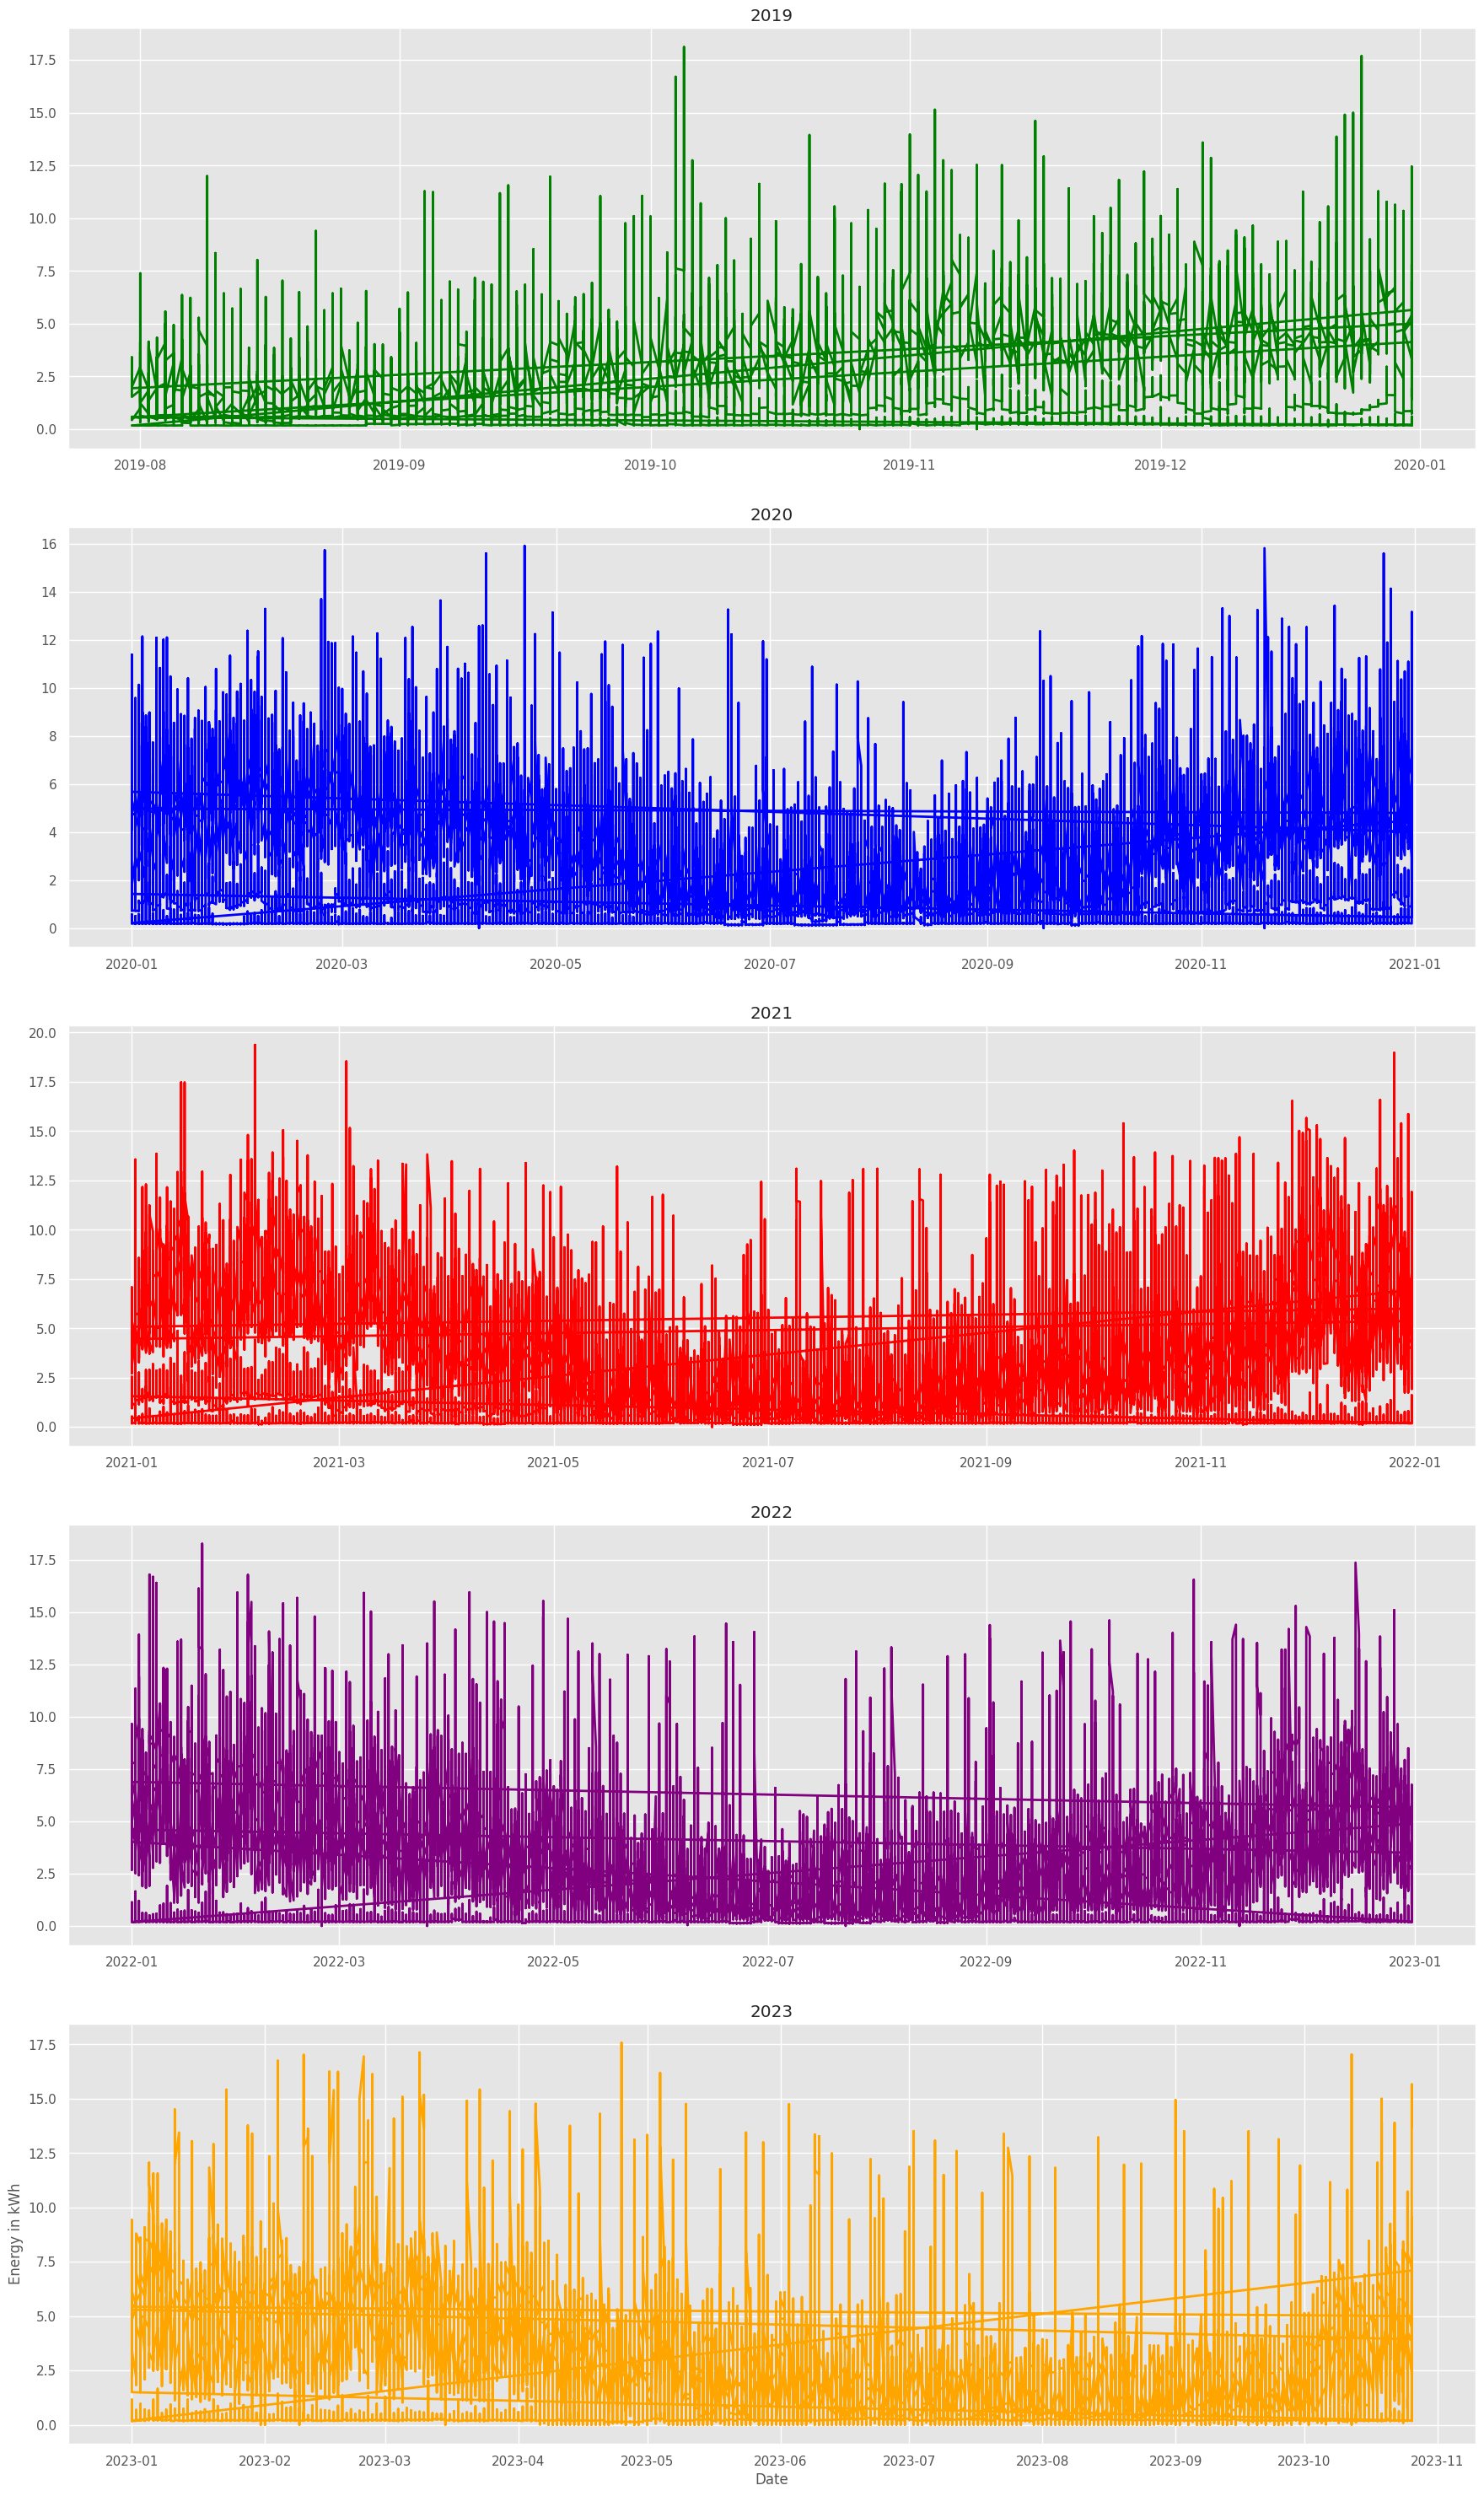

In [ ]:
from matplotlib import style
import matplotlib.pyplot as plt

fig = plt.figure()

# Adjust the subplot configuration to accommodate 5 rows and 1 column
ax1 = fig.add_subplot(511)  # 5 rows, 1 column, 1st plot
ax2 = fig.add_subplot(512)  # 5 rows, 1 column, 2nd plot
ax3 = fig.add_subplot(513)  # 5 rows, 1 column, 3rd plot
ax4 = fig.add_subplot(514)  # 5 rows, 1 column, 4th plot
ax5 = fig.add_subplot(515)  # 5 rows, 1 column, 5th plot

style.use('ggplot')

# Plot data for each year
y_2019 = data[data["Year"] == 2019]["Quantity"].to_list()
x_2019 = data[data["Year"] == 2019]["Date"].to_list()
ax1.plot(x_2019, y_2019, color="green", linewidth=2)
ax1.set_title("2019")

y_2020 = data[data["Year"] == 2020]["Quantity"].to_list()
x_2020 = data[data["Year"] == 2020]["Date"].to_list()
ax2.plot(x_2020, y_2020, color="blue", linewidth=2)
ax2.set_title("2020")

y_2021 = data[data["Year"] == 2021]["Quantity"].to_list()
x_2021 = data[data["Year"] == 2021]["Date"].to_list()
ax3.plot(x_2021, y_2021, color="red", linewidth=2)
ax3.set_title("2021")

y_2022 = data[data["Year"] == 2022]["Quantity"].to_list()
x_2022 = data[data["Year"] == 2022]["Date"].to_list()
ax4.plot(x_2022, y_2022, color="purple", linewidth=2)
ax4.set_title("2022")

y_2023 = data[data["Year"] == 2023]["Quantity"].to_list()
x_2023 = data[data["Year"] == 2023]["Date"].to_list()
ax5.plot(x_2023, y_2023, color="orange", linewidth=2)
ax5.set_title("2023")


plt.rcParams["figure.figsize"] = (18, 30)
fig.tight_layout(pad=3.0)
plt.xlabel("Date")
plt.ylabel("Energy in kWh")
plt.grid(True, alpha=1)

plt.show()

# Temperature distribution

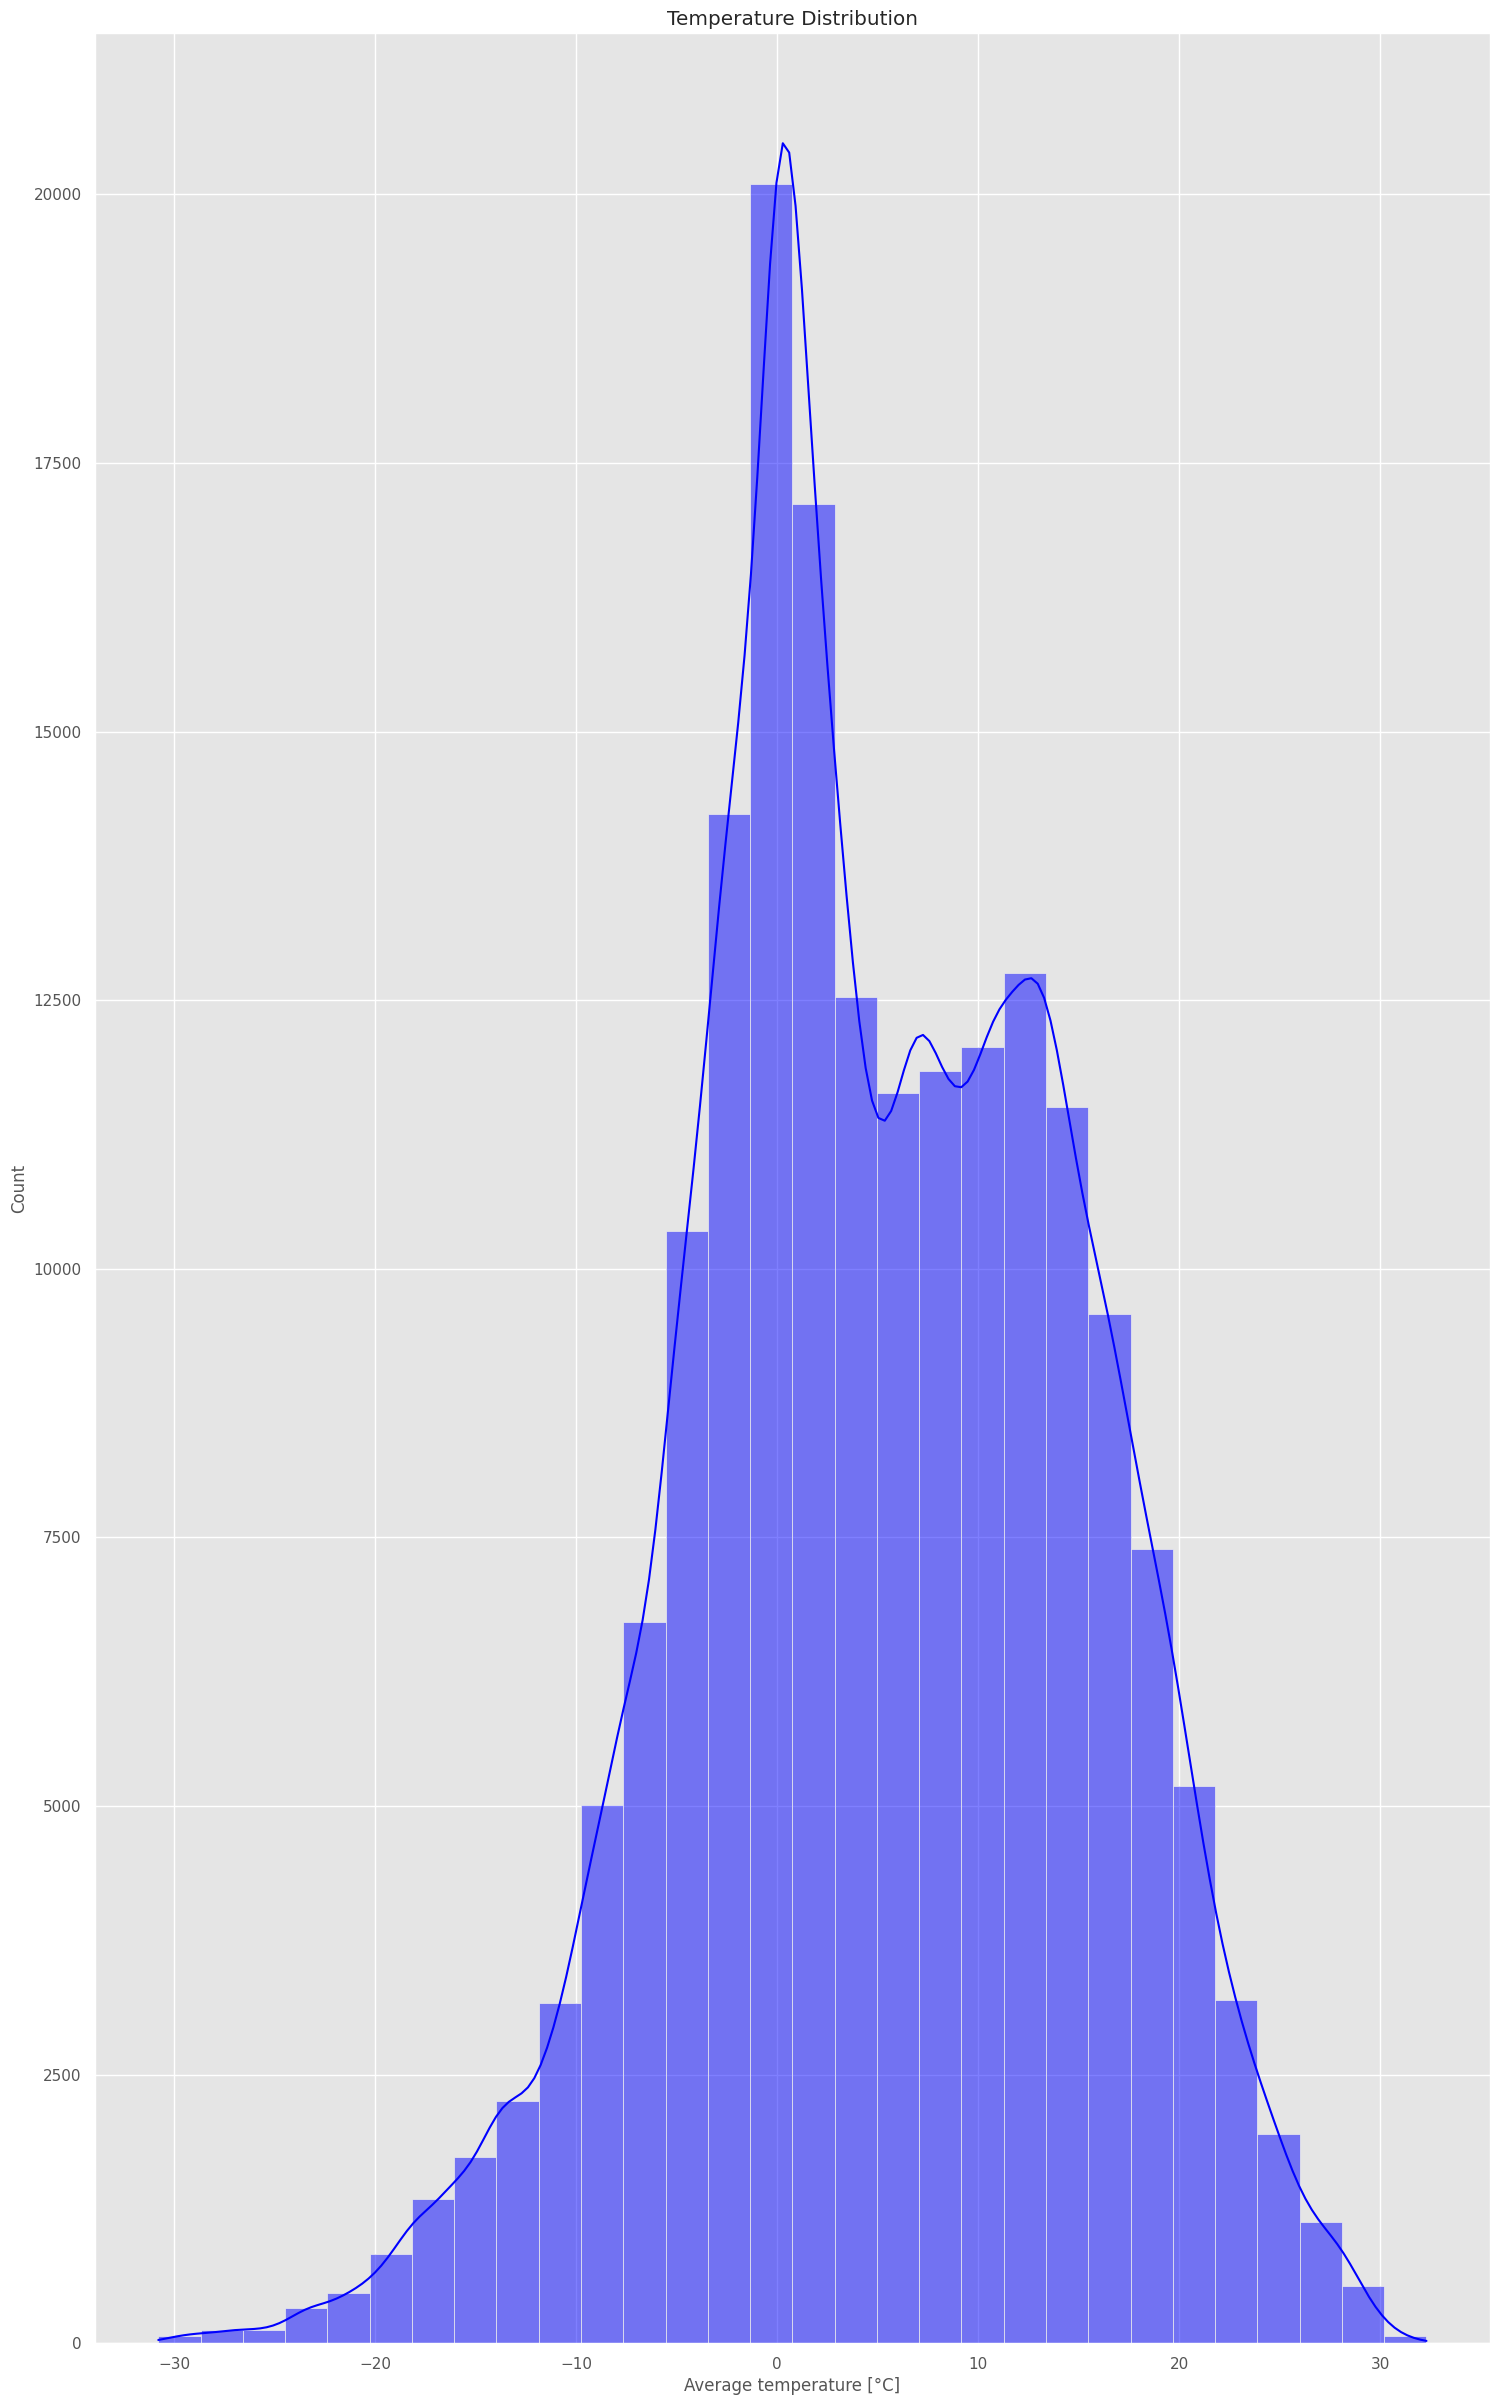

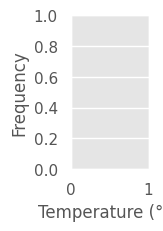

In [ ]:
# Temperature distribution
sns.histplot(data['Average temperature [°C]'], bins=30, kde=True, color='blue')
plt.title("Temperature Distribution")
plt.figure(figsize=(1, 2))
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

# Electricity usage distribution

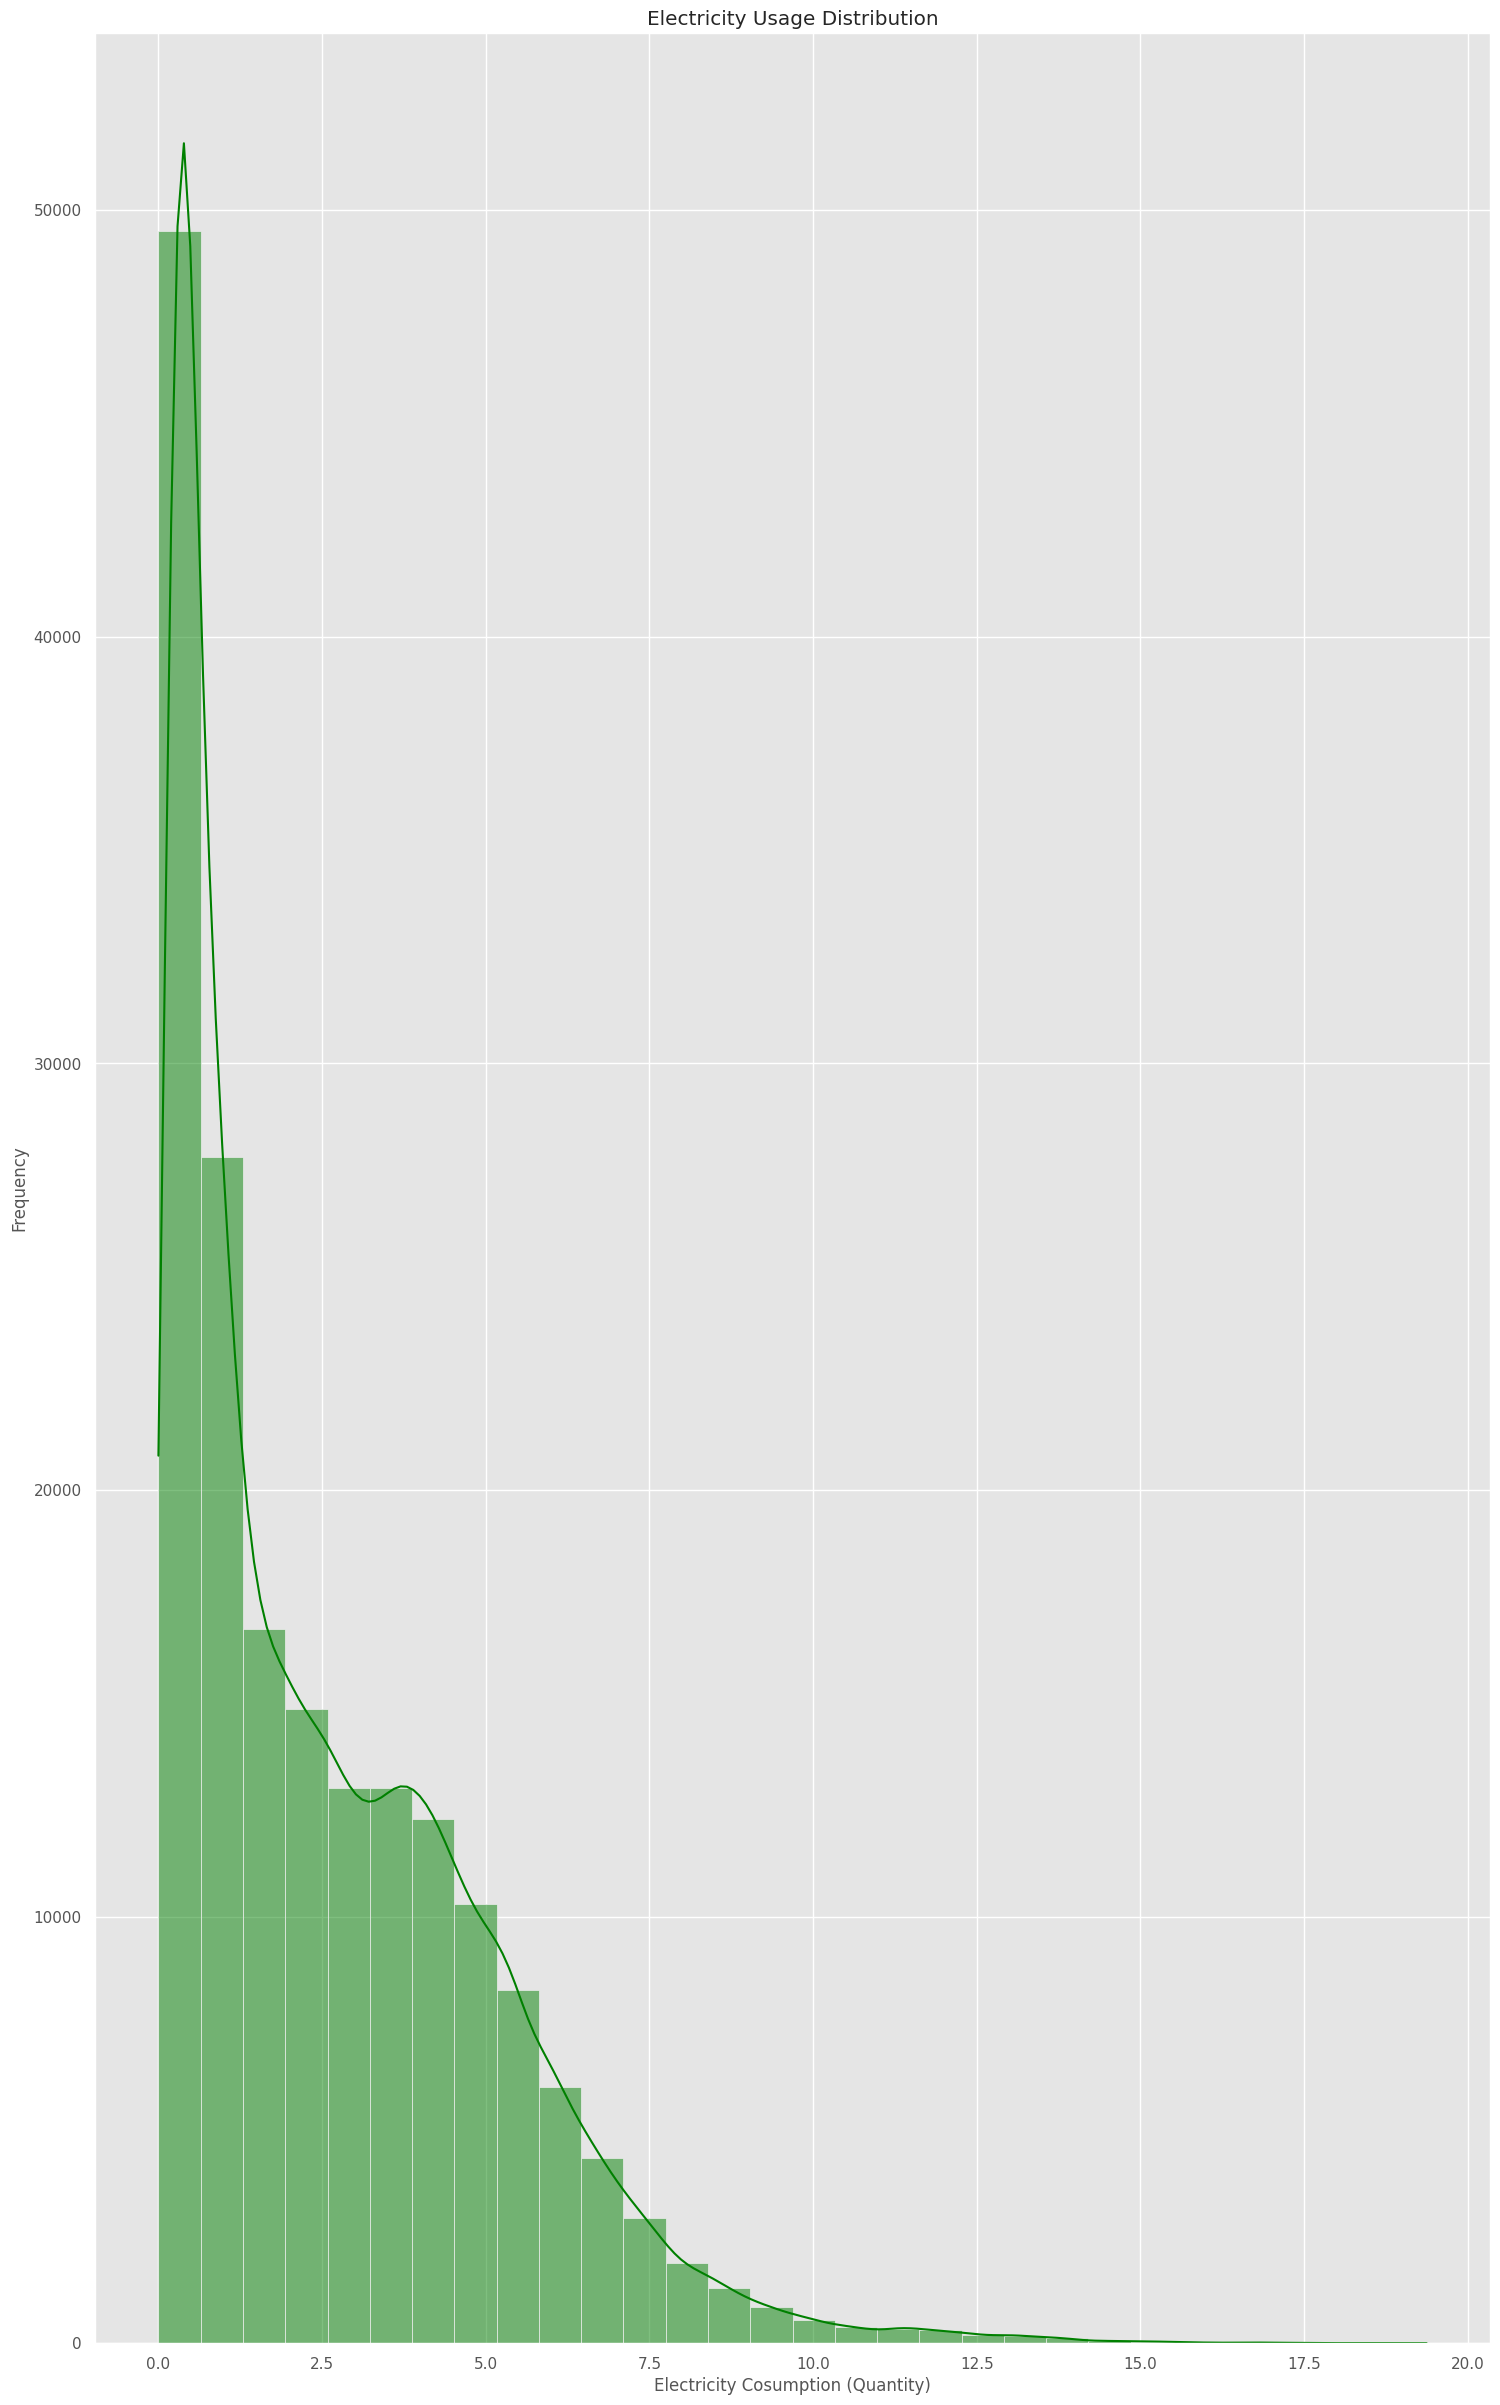

In [ ]:
# Electricity usage distribution
sns.histplot(data['Quantity'], bins=30, kde=True, color='green')
plt.title("Electricity Usage Distribution")
plt.xlabel("Electricity Cosumption (Quantity)")
plt.ylabel("Frequency")
plt.show()

Line Plot

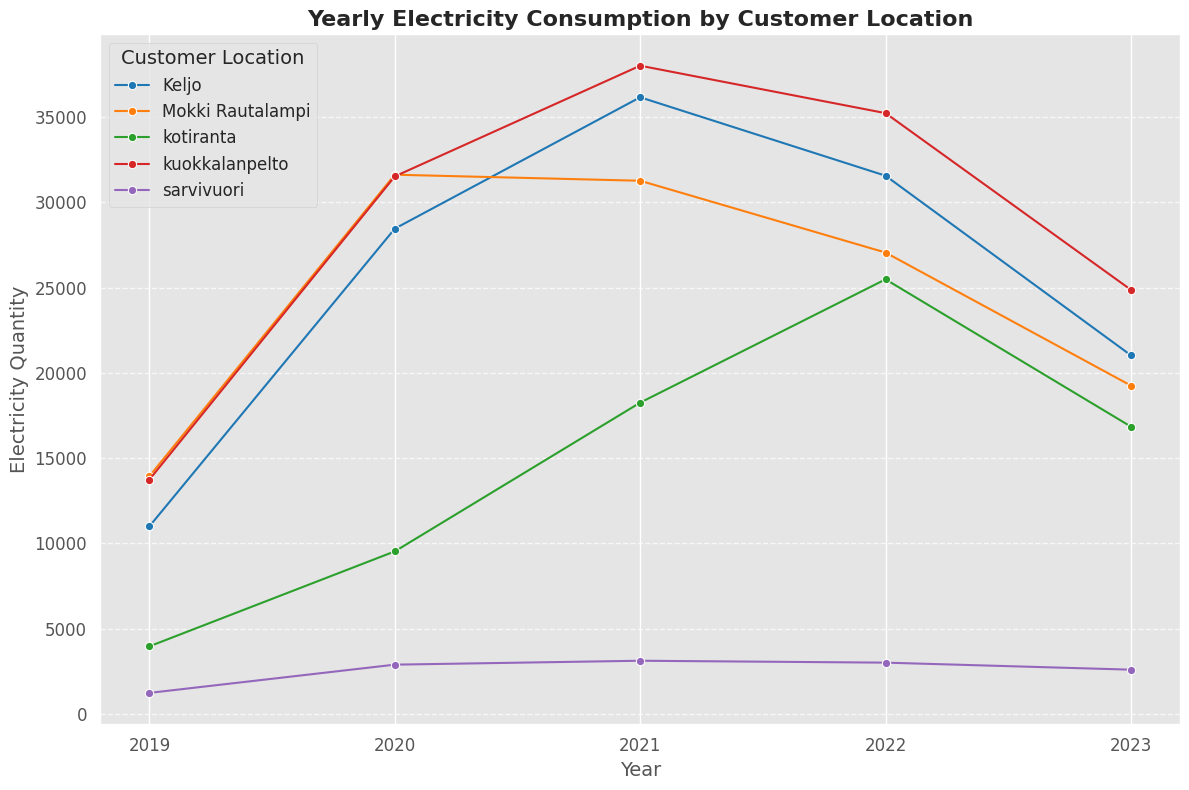

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'Date' column exists as a datetime object
data['datetime'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Extract year from datetime for grouping
data['year'] = data['datetime'].dt.year

# Group by year and customer location, summing up the quantity
yearly_consumption = data.groupby(['year', 'Customer Location'])['Quantity'].sum().reset_index()

# Plot a line plot for yearly consumption trends
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=yearly_consumption,
    x='year',
    y='Quantity',
    hue='Customer Location',
    marker='o',
    palette="tab10"
)


plt.title("Yearly Electricity Consumption by Customer Location", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Electricity Quantity", fontsize=14)
plt.xticks(yearly_consumption['year'].unique(), fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Customer Location", fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# compare monthly Electricicty  patterns across years.

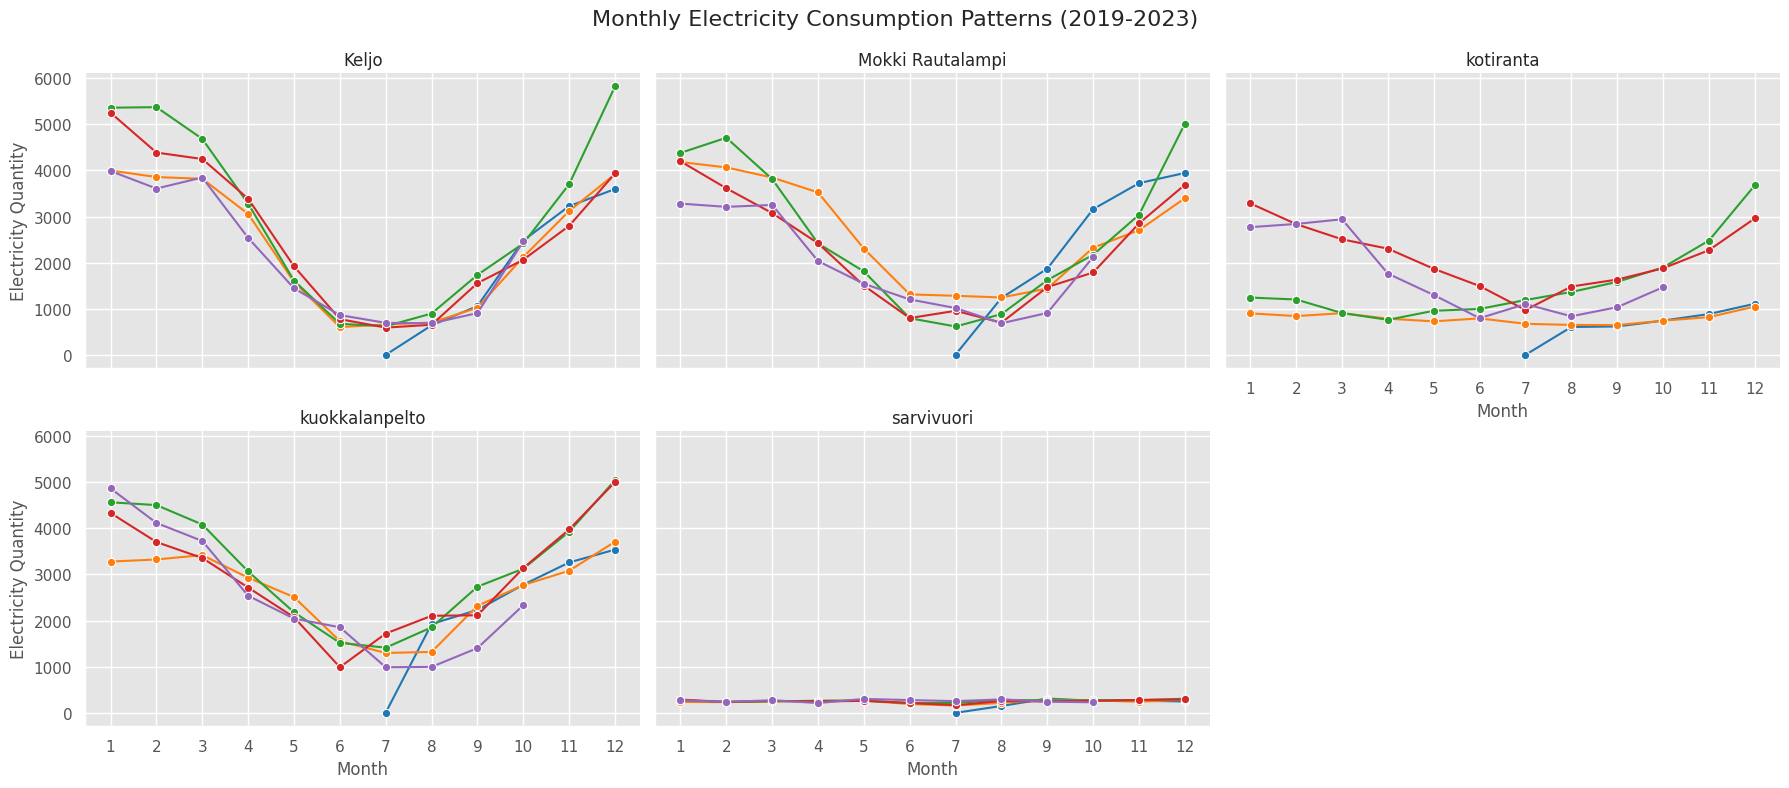

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by year, month, and customer location
monthly_consumption = data.groupby(['Year', 'Month', 'Customer Location'])['Quantity'].sum().reset_index()

# Create the Facet Grid
g = sns.FacetGrid(monthly_consumption, col="Customer Location", col_wrap=3, height=4, aspect=1.5)
g.map(
    sns.lineplot, "Month", "Quantity", "Year",
    marker="o", dashes=False, palette="tab10"
)


g.set_titles("{col_name}")
g.set_axis_labels("Month", "Electricity Quantity")
g.set(xticks=range(1, 13))
g.fig.suptitle("Monthly Electricity Consumption Patterns (2019-2023)", fontsize=16)
g.fig.subplots_adjust(top=0.9)
plt.show()

# Heatmap (Monthly Consumption Patterns Across Years)

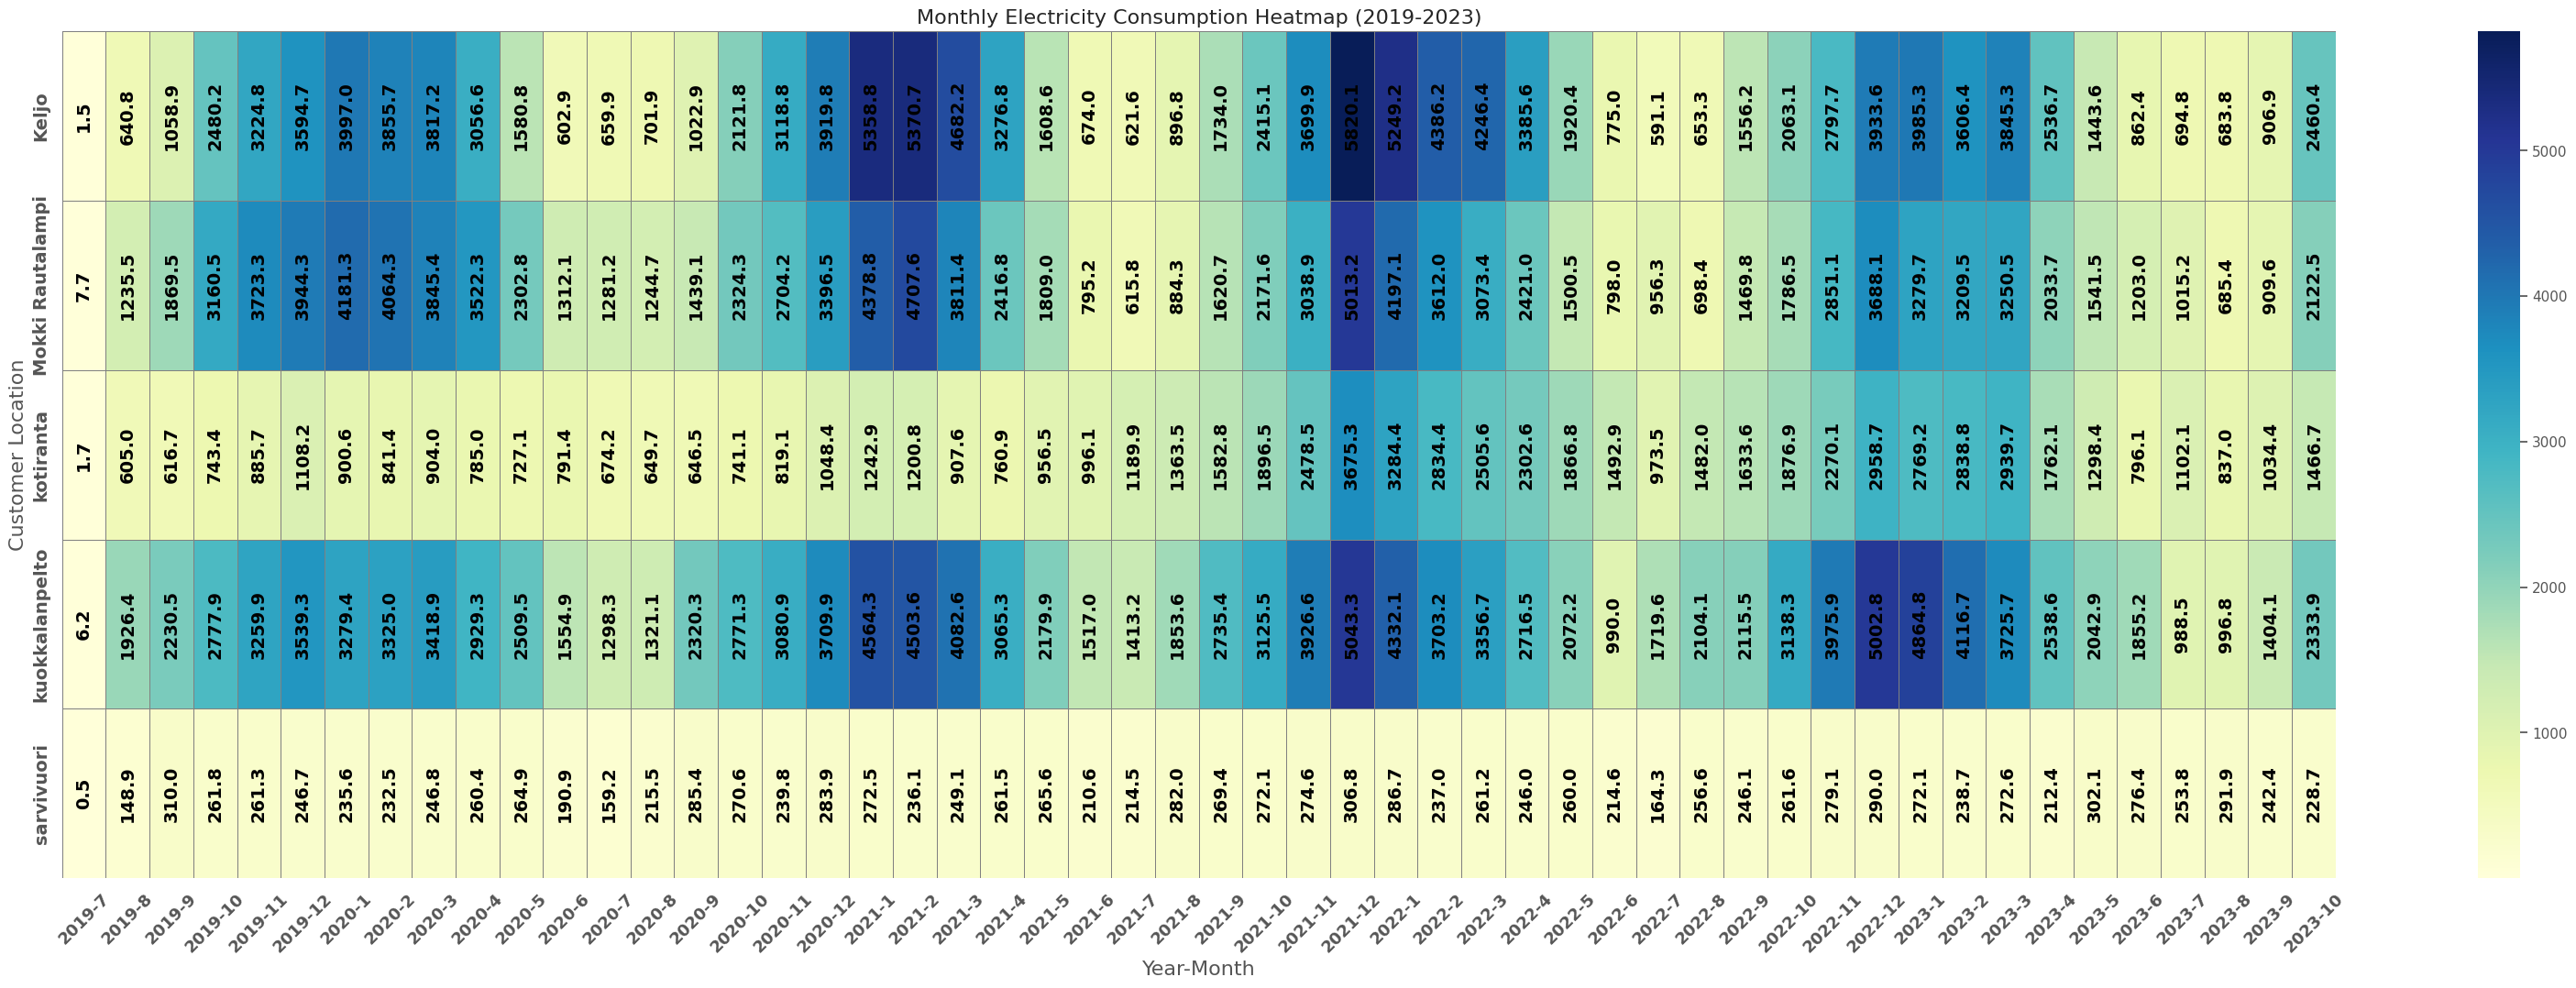

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


heatmap_data = data.groupby(['Customer Location', 'Year', 'Month'])['Quantity'].sum().reset_index()
heatmap_data = heatmap_data.pivot_table(index=['Customer Location'], columns=['Year', 'Month'], values='Quantity')


plt.figure(figsize=(40, 12))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    cbar=True,
    linewidths=0.5,
    annot_kws={"size": 14, "weight": "bold", "color": "black", "rotation": 90},
    linecolor='gray'
)


plt.title("Monthly Electricity Consumption Heatmap (2019-2023)", fontsize=16)
plt.xlabel("Year-Month", fontsize=16)
plt.ylabel("Customer Location", fontsize=16)



plt.xticks(fontsize=13, fontweight="bold", rotation=45)
plt.yticks(fontsize=14, fontweight="bold")



plt.show()


# Compare Average Monthly Consumption Trends Over the Years

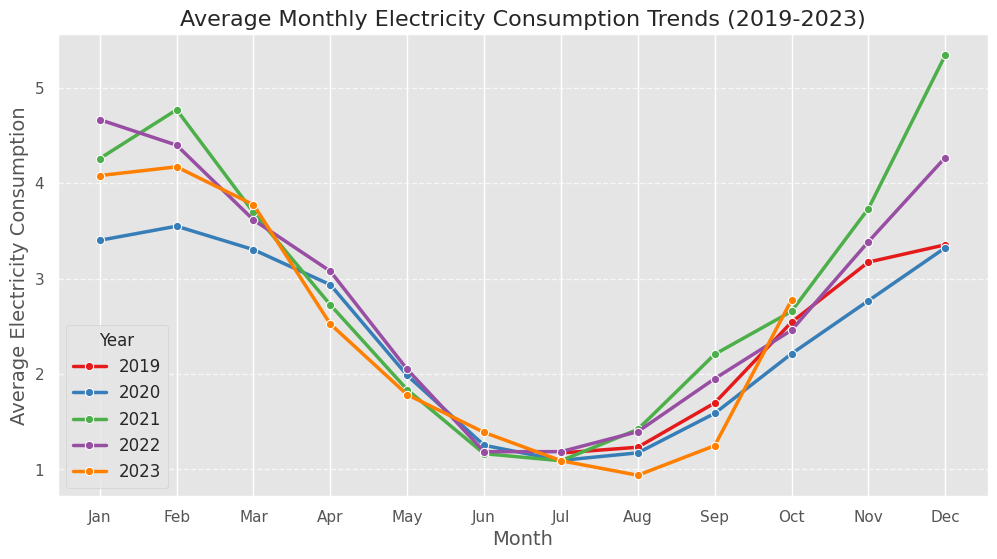

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


data['Date']=pd.to_datetime(data[['Year','Month','Day']])

data['Month'] = data['Date'].dt.month

# Group data by Year and Month, then calculate the average electricity consumption
monthly_trends = data.groupby(['Year', 'Month'])['Quantity'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x='Month', y='Quantity', hue='Year', marker='o', linewidth=2.5, palette='Set1')


plt.title("Average Monthly Electricity Consumption Trends (2019-2023)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Electricity Consumption", fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Year", fontsize=12)
plt.show()

# Comparing Different Customer Locations

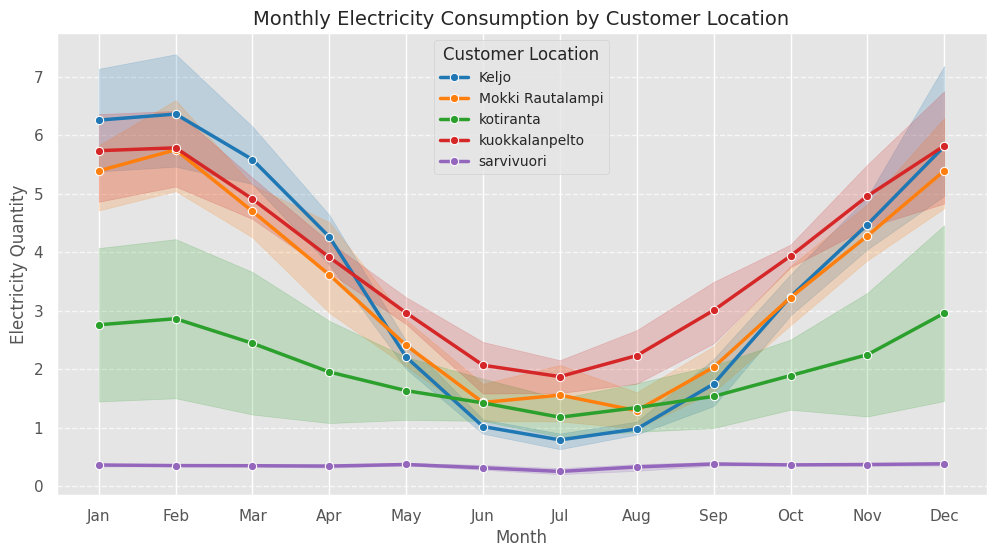

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group data by Year and Month, then calculate the average electricity consumption
monthly_trends = data.groupby(['Year', 'Month', 'Customer Location'])['Quantity'].mean().reset_index()


plt.figure(figsize=(12, 6))


sns.lineplot(data=monthly_trends,
             x='Month',
             y='Quantity',
             hue='Customer Location',  # Differentiates by customer location
             marker='o',
             linewidth=2.5,
             palette='tab10')

plt.title("Monthly Electricity Consumption by Customer Location", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Electricity Quantity", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Customer Location", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Electricicty consumption distribution of the 5 locations based on season
on 2024 Feb 16